In [1]:
import numpy as np
from sklearn.linear_model import Ridge


class ELM(Ridge):
    """Extreme Learning Machine simple implementation.
    
    param d: number of ELM features
    """
    
    # this scary code is simply copied from scikit-learn Github; this is a requirement
    def __init__(self, d=10, alpha=1.0, fit_intercept=True, normalize=False,
             copy_X=True, max_iter=None, tol=1e-3, solver="auto",
             random_state=None):
        super(ELM, self).__init__(alpha=alpha, fit_intercept=fit_intercept,
                                  normalize=normalize, copy_X=copy_X,
                                  max_iter=max_iter, tol=tol, solver=solver,
                                  random_state=random_state)  

        # actual ELM initialization
        self.d = d
        self.W = None
        self.bias = None

        
    def get_ELM_features(self, X):
        # create random matrix if it does not exist
        if self.W is None:
            d0 = X.shape[1]
            self.W = np.random.randn(d0, self.d)
            self.bias = np.random.randn(self.d)
            
        # make ELM features
        X_elm = np.tanh( np.dot(X, self.W) + self.bias )
        return X_elm

    
    def fit(self, *args, **kwargs):
        # replace original X (first argument) with ELM features
        newargs = list(args)
        newargs[0] = self.get_ELM_features(newargs[0])
        super(ELM, self).fit(*newargs, **kwargs)

        
    def predict(self, *args, **kwargs):
        # replace original X (first argument) with ELM features
        newargs = list(args)
        newargs[0] = self.get_ELM_features(newargs[0])
        return super(ELM, self).predict(*newargs, **kwargs)   

In [29]:
from sklearn.model_selection import cross_val_score
best_score = 0
for d in [5, 10, 20, 30, 40, 50]:
    for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # for each combination of parameters
        # train an ELM
        elm = ELM(d=d, alpha=alpha)
        # perform cross-validation
        scores = cross_val_score(elm, X, y, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and the parameters
        if score > best_score:
            best_score = score
            best_parameters = {'d':d,'alpha':alpha}
# rebuild a model on the combined training and validation set
elm = ELM(**best_parameters)
elm.fit(X,y)

In [30]:
best_score

0.48024164652353374

In [31]:
best_parameters

{'alpha': 0.1, 'd': 50}

In [32]:
param_grid = {'d':[5, 10, 20, 30, 40, 50], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [39]:
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'd': [5, 10, 20, 30, 40, 50]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(ELM(), param_grid, cv=5)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ELM(alpha=1.0, copy_X=True, d=10, fit_intercept=True, max_iter=None,
  normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'d': [5, 10, 20, 30, 40, 50], 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
grid_search.score(X_test, y_test)

0.57529524659385389

In [44]:
grid_search.best_params_

{'alpha': 0.01, 'd': 50}

In [45]:
grid_search.best_score_

0.56632917074055444

In [46]:
grid_search.best_estimator_

ELM(alpha=0.01, copy_X=True, d=50, fit_intercept=True, max_iter=None,
  normalize=False, random_state=None, solver='auto', tol=0.001)

import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.head()

In [57]:
scores = np.array(results.mean_test_score).reshape(7,6)

In [52]:
import mglearn

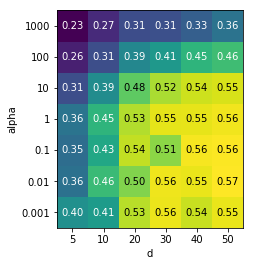

In [59]:
%matplotlib inline
mglearn.tools.heatmap(scores, xlabel='d', xticklabels=param_grid['d'], ylabel='alpha', yticklabels=param_grid['alpha'],cmap="viridis")